In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage.filters import gaussian_filter1d

data = pd.read_excel(r'C:\Users\Utilisateur\Documents\Python Scripts\NumberOfBirthVSFullMoon\TF_BIRTHS.xlsx')
data.head(-10)

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_9676\816739341.py:5: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d
c:\Users\Utilisateur\anaconda3\envs\libDataScience\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,DT_DATE,MS_NUM_BIRTHS
0,1992-01-01,219
1,1992-01-02,331
2,1992-01-03,420
3,1992-01-04,282
4,1992-01-05,252
...,...,...
10943,2021-12-17,374
10944,2021-12-18,213
10945,2021-12-19,211
10946,2021-12-20,386


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_9676\587496182.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data['smooth'] = sub_data_smoothed


        DT_DATE  MS_NUM_BIRTHS  smooth
9863 2019-01-02            327     312
9864 2019-01-03            338     310
9865 2019-01-04            358     308
9866 2019-01-05            215     307
9867 2019-01-06            220     308


<AxesSubplot: xlabel='DT_DATE', ylabel='MS_NUM_BIRTHS'>

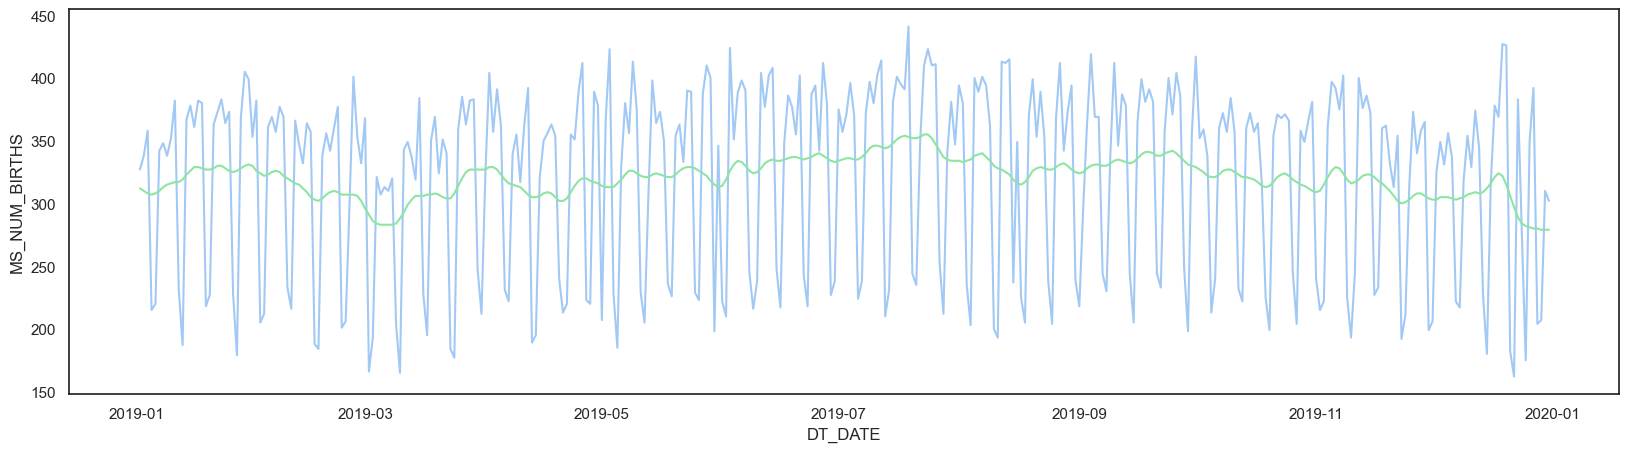

In [2]:
annee = 2019
sub_data = data.loc[(data['DT_DATE']>str(annee)+'-01-01') & (data['DT_DATE']<str(annee+1)+'-01-01'), :]

# compute smoothing using gaussian filter 1d de Scipy
sigma = 3
sub_data_smoothed = gaussian_filter1d(np.array(sub_data['MS_NUM_BIRTHS']), sigma=sigma)
sub_data['smooth'] = sub_data_smoothed

print(sub_data.head())

plt.figure(figsize=(20,5))

sns.set_theme(style='white', palette='pastel')
sns.lineplot(data=sub_data, x='DT_DATE', y='MS_NUM_BIRTHS')
sns.lineplot(data=sub_data, x='DT_DATE', y='smooth', color='g')



2016 est bisextile
2020 est bisextile


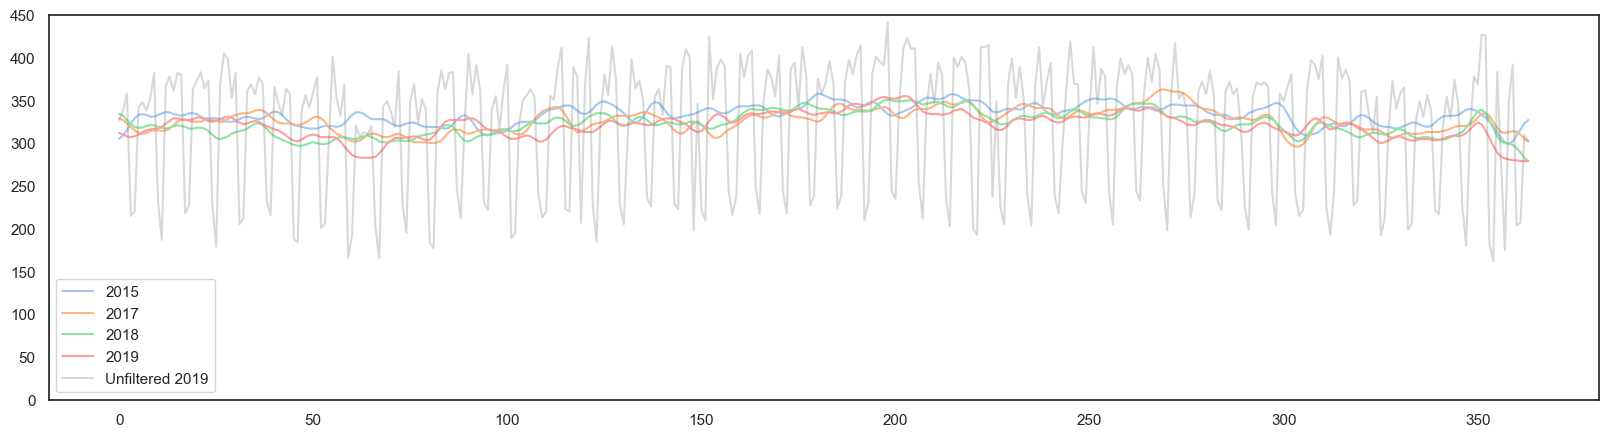

In [36]:
# superpose several years to see tendancy (guassian filtered)

plt.figure(figsize=(20,5))
sns.set_theme(style='white', palette='pastel')

# year loop
year_data = pd.DataFrame()

for year in range(2015, 2021):
    data_tmp = data.loc[(data['DT_DATE']>str(year)+'-01-01') & (data['DT_DATE']<str(year+1)+'-01-01'), :]

    # compute smoothing using gaussian filter 1d de Scipy
    sigma = 3
    year_data_smoothed =gaussian_filter1d(np.array(data_tmp['MS_NUM_BIRTHS']), sigma=sigma)

    if len(year_data_smoothed) == 364:
        year_data[str(year)] = year_data_smoothed
        plt.plot(range(364), year_data[str(year)], label=year)
    else : 
        print(f'{year} est bisextile')


# add last year on plot (without filter)
data_2019 = data.loc[(data['DT_DATE']>'2019-01-01') & (data['DT_DATE']<'2020-01-01'), :]
plt.plot(range(364), data_2019['MS_NUM_BIRTHS'], color = 'grey', alpha=0.3, label='Unfiltered 2019')

plt.ylim((0,450))
plt.legend()
plt.show()


        Date   Moon
0 2019-01-06  212.0
1 2019-01-14  301.5
2 2019-01-21  391.0
3 2019-01-27  301.5
4 2019-02-04  212.0


<AxesSubplot: xlabel='Date', ylabel='Moon'>

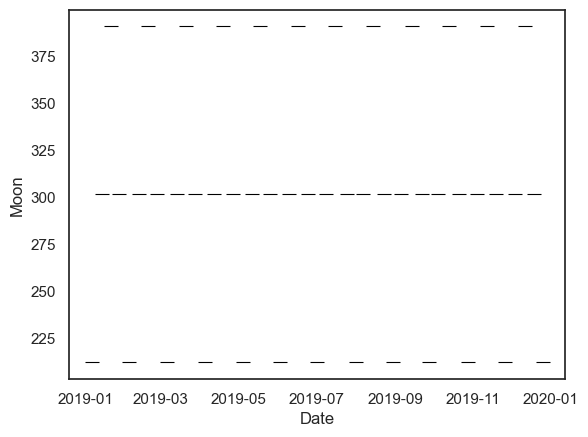

In [13]:
# moon calendar 2019

moon_2019 = pd.DataFrame({
    'Date': ['2019-01-06', '2019-01-14', '2019-01-21', '2019-01-27', 
    '2019-02-04', '2019-02-12', '2019-02-19', '2019-02-26', 
    '2019-03-06', '2019-03-14', '2019-03-21', '2019-03-28', 
    '2019-04-05', '2019-04-12', '2019-04-19', '2019-04-27', 
    '2019-05-05', '2019-05-12', '2019-05-18', '2019-05-26',
    '2019-06-03', '2019-06-10', '2019-06-17', '2019-06-25', 
    '2019-07-02', '2019-07-09', '2019-07-16', '2019-07-25', 
    '2019-08-01', '2019-08-07', '2019-08-15', '2019-08-23', 
    '2019-08-30', '2019-09-06', '2019-09-14', '2019-09-22', 
    '2019-09-28', '2019-10-05', '2019-10-13', '2019-10-21', 
    '2019-10-28', '2019-11-04', '2019-11-12', '2019-11-19', 
    '2019-11-26', '2019-12-04', '2019-12-12', '2019-12-19',
    '2019-12-26'], 
    'Moon': [0, 0.5, 1, 0.5, 
    0, 0.5, 1, 0.5, 
    0, 0.5, 1, 0.5,
    0, 0.5, 1, 0.5,
    0, 0.5, 1, 0.5,
    0, 0.5, 1, 0.5,
    0, 0.5, 1, 0.5,
    0, 0.5, 1, 0.5,
    0, 0.5, 1, 0.5,
    0, 0.5, 1, 0.5,
    0, 0.5, 1, 0.5,
    0, 0.5, 1, 0.5,
    0]
})

moon_2019['Date'] = pd.to_datetime(moon_2019['Date'])

# TODO : afficher une ligne verticale de chaque pleine lune (a la place de traits)
# ponderer par les valeur de naissance
moon_2019.loc[moon_2019['Moon']==1, 'Moon'] = max(sub_data['MS_NUM_BIRTHS']) - 50
moon_2019.loc[moon_2019['Moon']==0, 'Moon'] = min(sub_data['MS_NUM_BIRTHS']) + 50
moon_2019.loc[moon_2019['Moon']==0.5, 'Moon'] = min(sub_data['MS_NUM_BIRTHS']) + (max(sub_data['MS_NUM_BIRTHS']) - min(sub_data['MS_NUM_BIRTHS'])) / 2

print(moon_2019.head())

sns.set_style('white')
sns.scatterplot(data=moon_2019, x='Date', y='Moon', color='black', marker='_', s=100)

In [14]:
# show sundays on plot
import calendar

obj = calendar.Calendar()
list_daysWeeks = obj.yeardayscalendar(annee)

sundays = []

for t, trimestre in enumerate(list_daysWeeks):
    for m, month in enumerate(trimestre):
        for week in month:
            for d, day in enumerate(week): 

                if day != 0:
                    if d==6:
                        sundays.append([str(annee)+'-'+str(3*t+m+1) +'-' + str(day), True])
                    else:
                        sundays.append([str(annee)+'-'+str(3*t+m+1) +'-' + str(day), False])

# create dataframe of sundays
array_sundays = np.array(sundays)

DF_sundays = pd.DataFrame()
DF_sundays['Date'] = pd.Series(array_sundays[:,0])
DF_sundays['Date'] = pd.to_datetime(DF_sundays['Date'])
DF_sundays['Sunday'] = pd.Series(array_sundays[:,1])

DF_sundays['Value'] = pd.Series(np.zeros(len(array_sundays)))
DF_sundays.loc[DF_sundays['Sunday']=='True', 'Value'] = 1000
DF_sundays.loc[DF_sundays['Sunday']=='False', 'Value'] = 0


DF_sundays.head(10)


,Date,Sunday,Value
0,2019-01-01,False,0.0
1,2019-01-02,False,0.0
2,2019-01-03,False,0.0
3,2019-01-04,False,0.0
4,2019-01-05,False,0.0
5,2019-01-06,True,1000.0
6,2019-01-07,False,0.0
7,2019-01-08,False,0.0
8,2019-01-09,False,0.0
9,2019-01-10,False,0.0


<AxesSubplot: xlabel='DT_DATE', ylabel='MS_NUM_BIRTHS'>

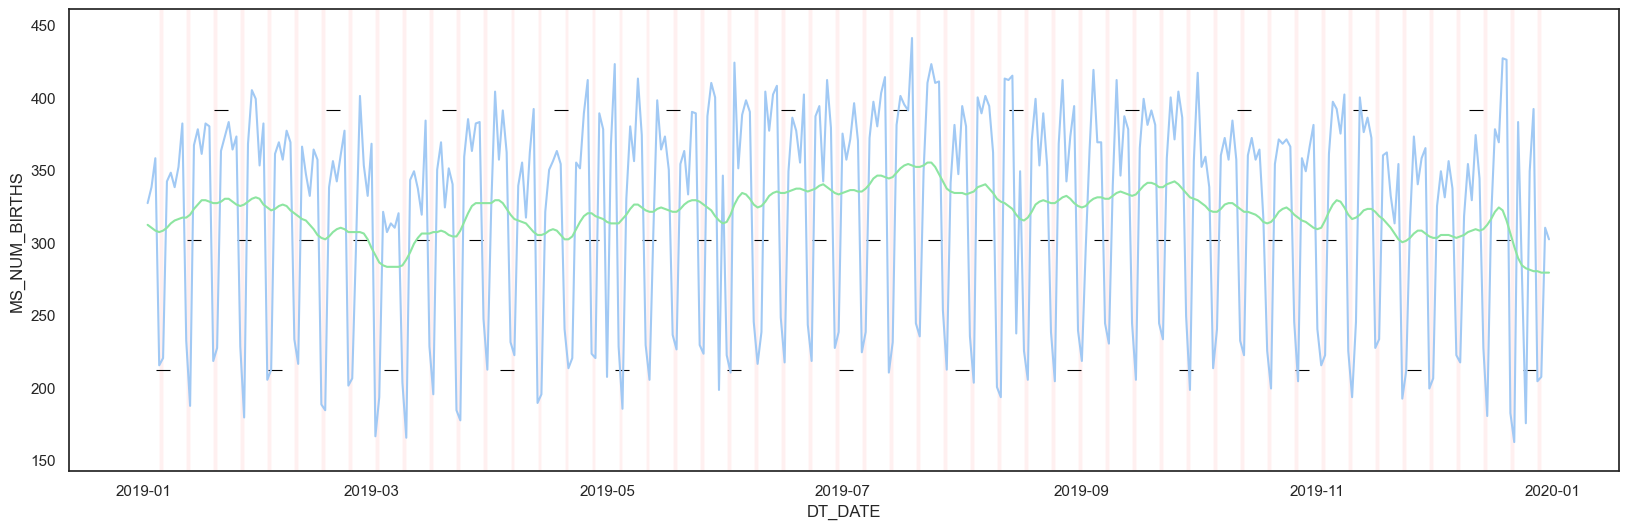

In [15]:
plt.figure(figsize=(20,6))

sns.set_theme(style='white', palette='pastel')
sns.lineplot(data=sub_data, x='DT_DATE', y='MS_NUM_BIRTHS')
sns.lineplot(data=sub_data, x='DT_DATE', y='smooth', color='g')

# plot color bar when the date is sunday
plt.bar(x=DF_sundays['Date'], height=DF_sundays['Value'], color='r', alpha=0.15, width=-1, align='edge')
plt.ylim(min(sub_data['MS_NUM_BIRTHS'])-20, max(sub_data['MS_NUM_BIRTHS'])+20)

# plot evolution of moon calendar (by quarter)
sns.scatterplot(data=moon_2019, x='Date', y='Moon', marker='_', color='black', s=100)
